## **House Price Prediction using Scikit-learn and Tensorflow**

### **Import** **Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("USA_housing.csv")

In [ ]:
data.head(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02 00:00:00,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02 00:00:00,335000.0,2.0,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02 00:00:00,482000.0,4.0,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02 00:00:00,452500.0,3.0,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02 00:00:00,640000.0,4.0,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


In [ ]:
data.tail(20)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4580,2014-07-07 00:00:00,282508.888889,3.0,1.00,1560,7552,1.0,0,0,4,910,650,1948,0,228 NE 174th St,Shoreline,WA 98155,USA
4581,2014-07-07 00:00:00,473200.000000,3.0,1.50,1740,4200,1.5,0,0,4,1640,100,1920,0,6714 4th Ave NW,Seattle,WA 98117,USA
4582,2014-07-07 00:00:00,406062.500000,2.0,1.00,1290,4650,1.0,0,0,4,1290,0,1906,1990,312 NE 81st St,Seattle,WA 98115,USA
4583,2014-07-07 00:00:00,282766.666667,4.0,2.00,1700,8640,1.0,0,0,3,850,850,1955,2010,3706 140th Ave SE,Bellevue,WA 98006,USA
4584,2014-07-07 00:00:00,486445.833333,3.0,1.75,1880,10032,1.0,0,0,4,1880,0,1984,0,13345 SE 55th Pl,Bellevue,WA 98006,USA
4585,2014-07-07 00:00:00,486895.000000,3.0,1.00,1890,3330,1.5,0,0,4,1390,500,1901,0,4324 Dayton Ave N,Seattle,WA 98103,USA
4586,2014-07-07 00:00:00,430277.777778,3.0,2.25,1620,1075,3.0,0,0,3,1540,80,2009,0,972 4th Ave NE,Issaquah,WA 98029,USA
4587,2014-07-08 00:00:00,229629.500000,2.0,1.00,770,8149,1.0,0,0,3,770,0,1948,1994,16040 28th Ave NE,Shoreline,WA 98155,USA
4588,2014-07-08 00:00:00,0.000000,4.0,2.25,2890,18226,3.0,1,4,3,2890,0,1984,0,3227-3399 Mountain View Ave N,Renton,WA 98056,USA
4589,2014-07-08 00:00:00,182805.000000,3.0,1.00,1040,8892,1.0,0,0,4,800,240,1958,1972,1028 SW 307th St,Federal Way,WA 98023,USA


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [ ]:
data.shape

(4600, 18)

In [ ]:
data.size

82800

In [ ]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
data.isna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
data = data.iloc[:,1:]
data_norm = (data - data.mean())/ data.std()
data_norm.head()

,bathrooms,bedrooms,city,condition,country,floors,price,sqft_above,sqft_basement,sqft_living,sqft_lot,statezip,street,view,waterfront,yr_built,yr_renovated
0,-0.843112,-0.441074,NaN,-0.667040,NaN,-0.022414,-0.423817,-0.565162,-0.672391,-0.829881,-0.193413,NaN,NaN,-0.309161,-0.084995,-0.530956,1.221538
1,0.432754,1.759513,NaN,2.286168,NaN,0.906456,3.249245,1.789365,-0.069121,1.568358,-0.161700,NaN,NaN,4.829554,-0.084995,-1.674511,-0.825604
2,-0.205179,-0.441074,NaN,0.809564,NaN,-0.951284,-0.372384,0.119158,-0.672391,-0.217344,-0.080969,NaN,NaN,-0.309161,-0.084995,-0.160982,-0.825604
3,0.113788,-0.441074,NaN,0.809564,NaN,-0.951284,-0.234046,-0.959517,1.482145,-0.144670,-0.190125,NaN,NaN,-0.309161,-0.084995,-0.261884,-0.825604
4,0.432754,0.659220,NaN,0.809564,NaN,-0.951284,-0.003481,-0.797135,1.051238,-0.206962,-0.121293,NaN,NaN,-0.309161,-0.084995,0.175357,1.208264


###**EDA for House Price Pridiction**

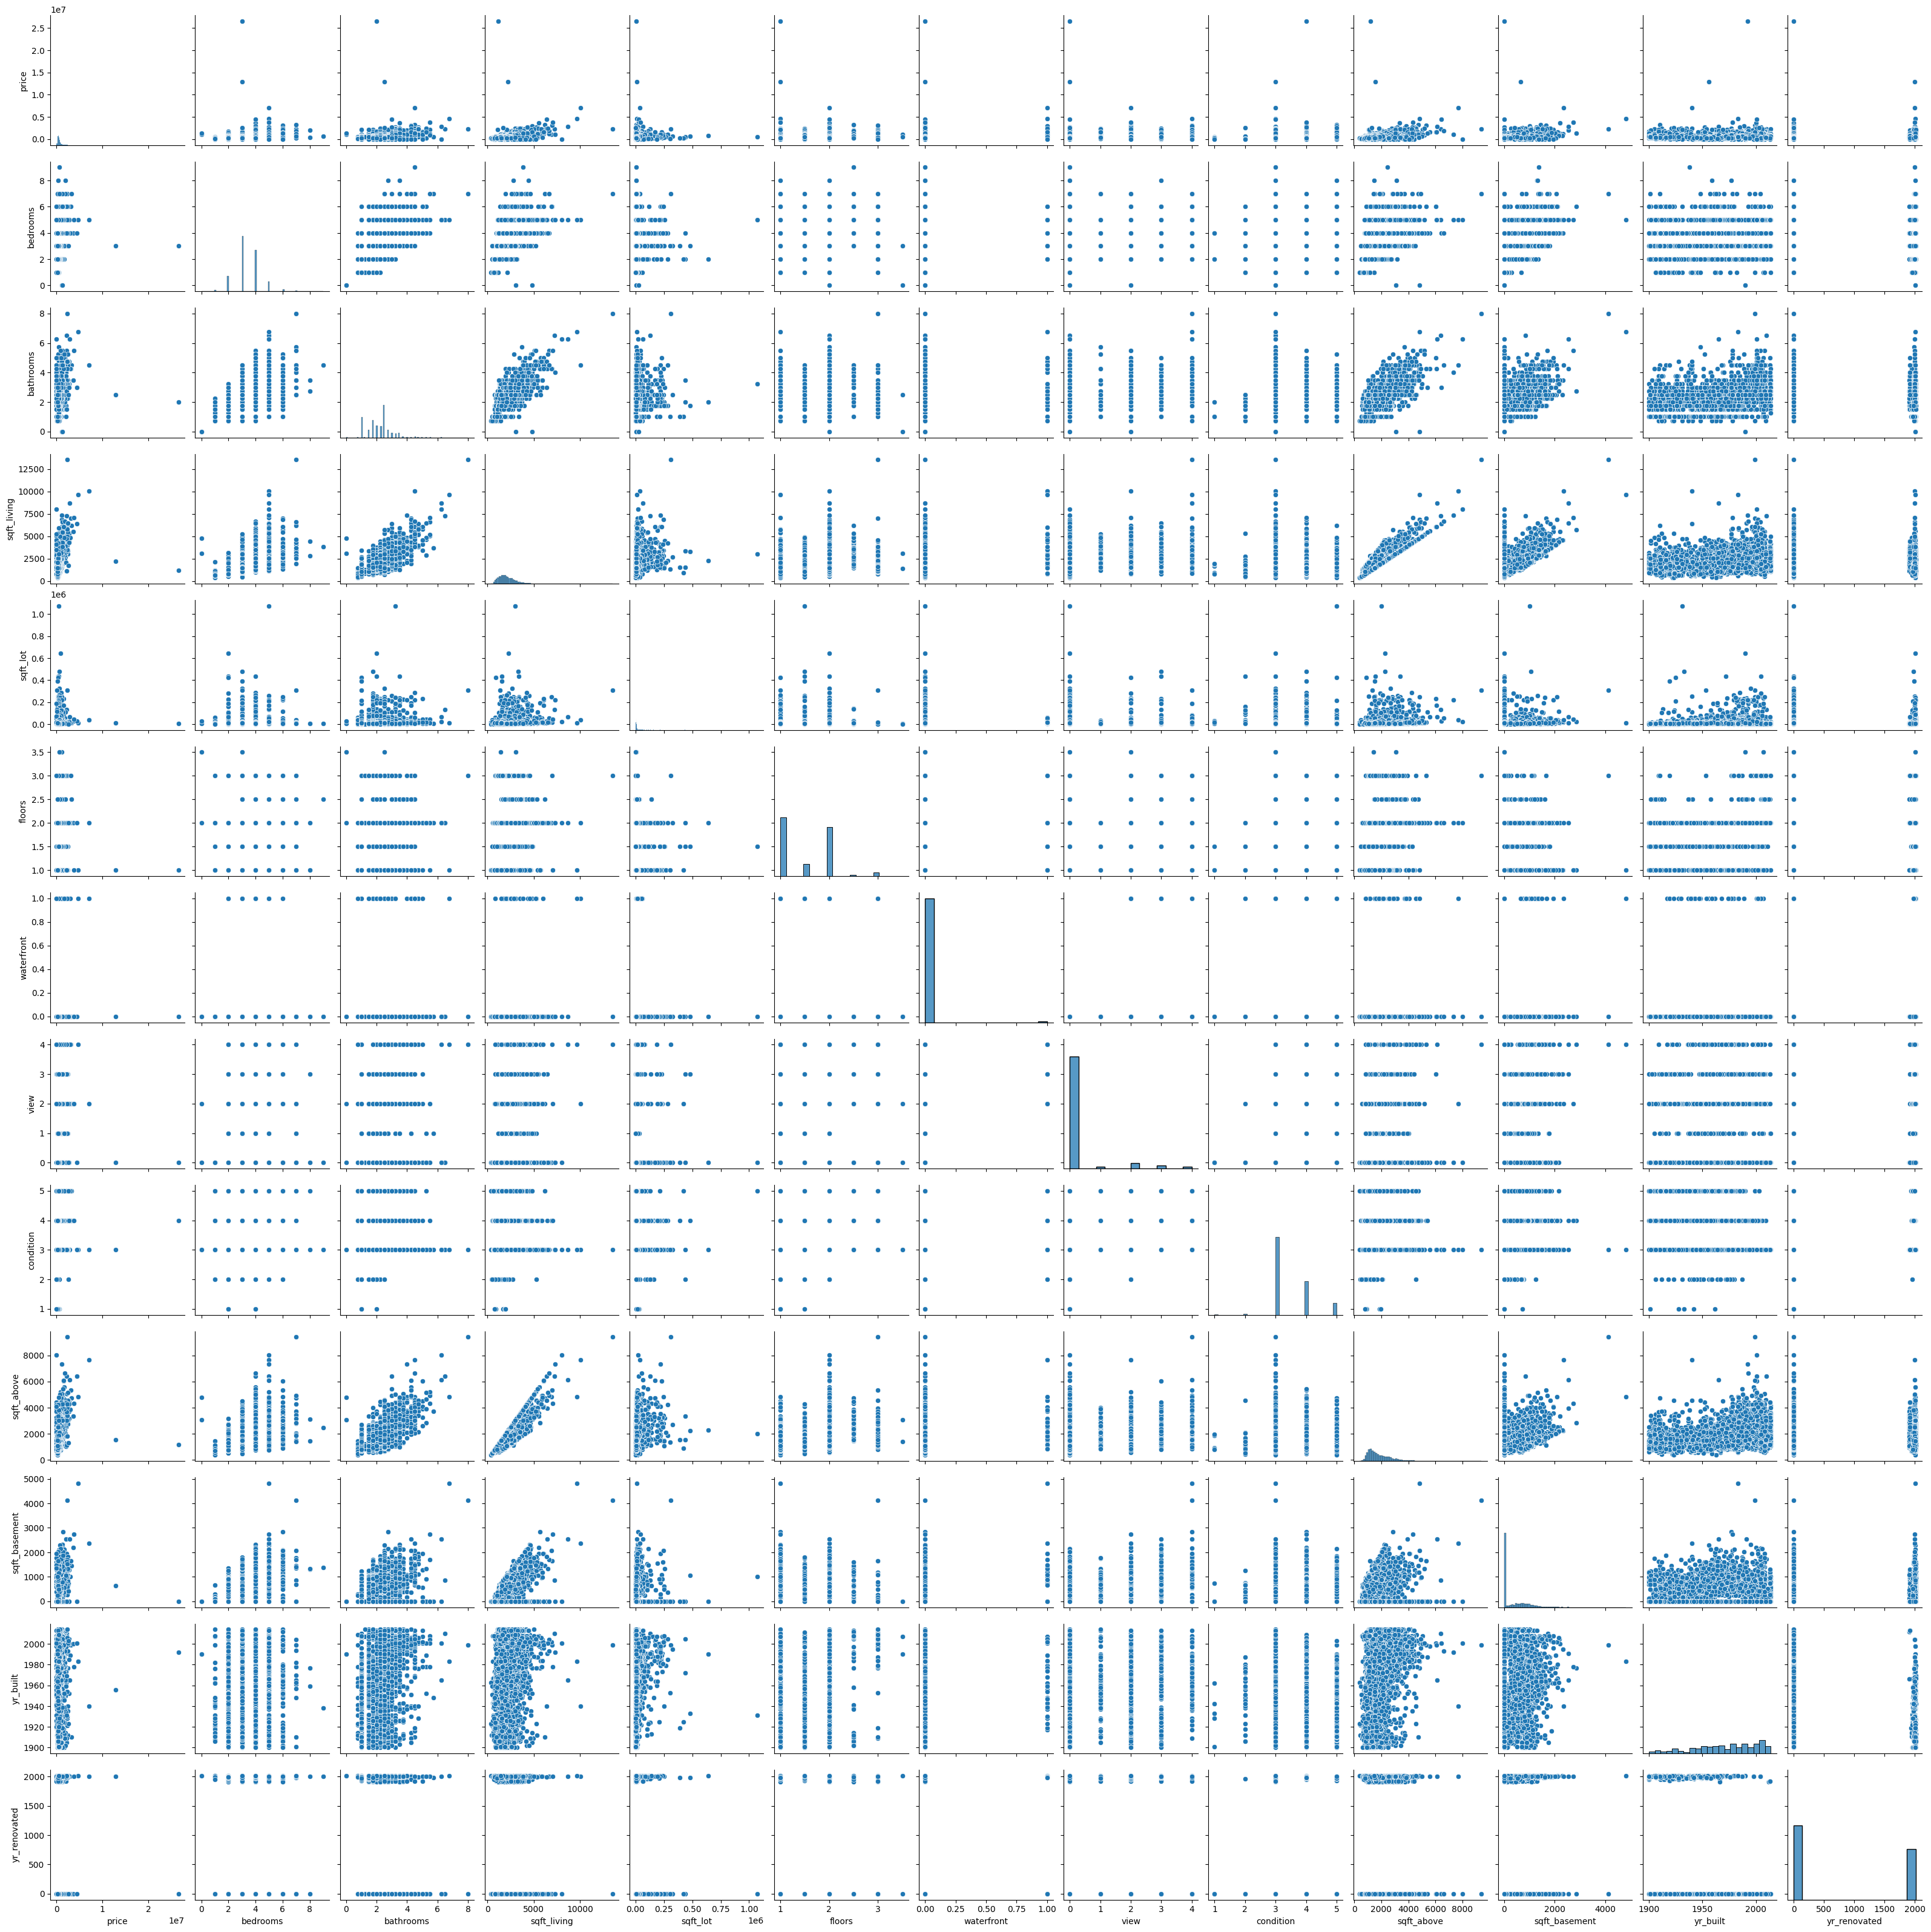

In [ ]:
sns.pairplot(data)

<Axes: xlabel='price', ylabel='Count'>

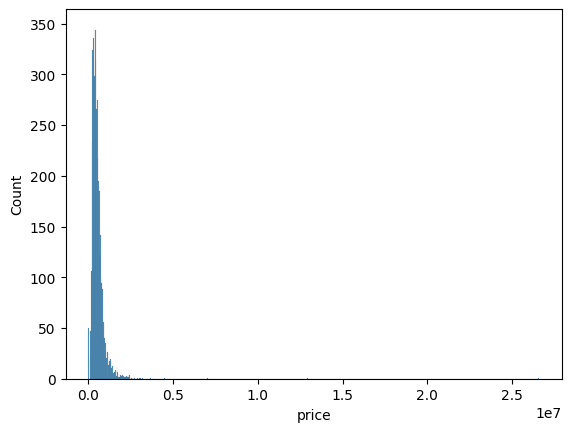

In [ ]:
sns.histplot(data['price'])

<Axes: >

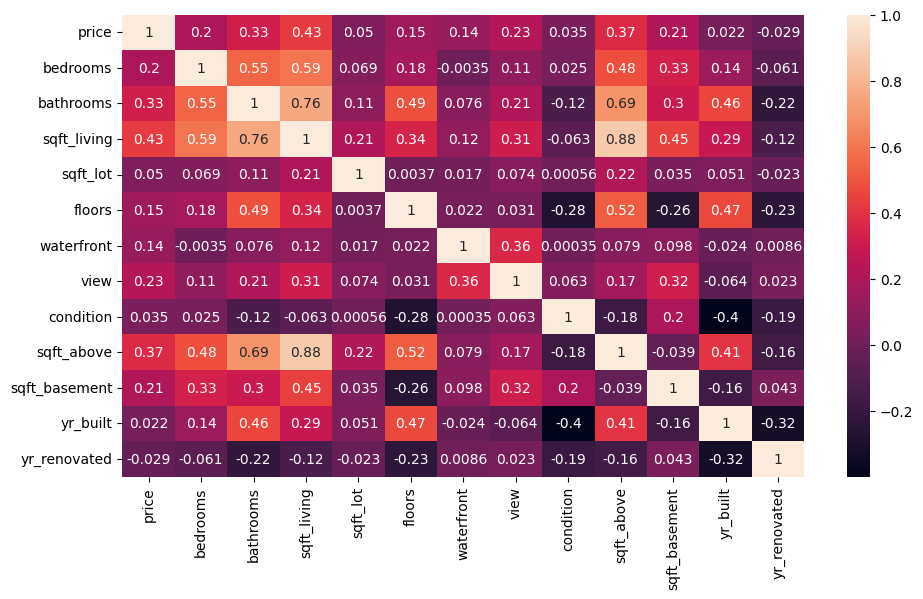

In [ ]:
plt.figure(figsize=(11, 6))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


#### **X and y List**

In [ ]:
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated']]
y = data['price']

In [ ]:
X_arr = X.values
y_arr = y.values

#### **Split Data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.01,shuffle = True, random_state=1)

In [ ]:
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (4554, 12)
y_train shape: (4554,)
X_test shape: (46, 12)
y_test shape: (46,)


In [ ]:
def get_model():
  model = Sequential([
      Dense(10, input_shape = (12,),activation = 'relu'),
      Dense(20, activation = 'relu'),
      Dense(5, activation = 'relu'),
      Dense(1)
  ])

  model.compile(
      loss = 'mse',
      optimizer = 'adadelta'
  )
  return model

In [ ]:
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 5)                 105       
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 461 (1.80 KB)
Trainable params: 461 (1.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model = get_model()

preds_on_untrained = model.predict(X_test)

2/2 [==============================] - 0s 7ms/step


 ### **Using scikit-learn for linear regression**

###Creating and Training

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression()

In [ ]:
linear_model.fit(X_train, y_train)

###Model Evaluation

In [ ]:
print(linear_model.intercept_)

4606382.792389882


#### **Predictions from our Model**


In [ ]:
coeff_data = pd.DataFrame(linear_model.coef_,X.columns,columns=['Coefficient'])
coeff_data

,Coefficient
bedrooms,-57887.915808
bathrooms,57802.865138
sqft_living,164.061079
sqft_lot,-0.699018
floors,40132.396484
waterfront,354631.740003
view,45890.354359
condition,31815.160554
sqft_above,96.979246
sqft_basement,67.081834


In [ ]:
predictions = linear_model.predict(X_test)

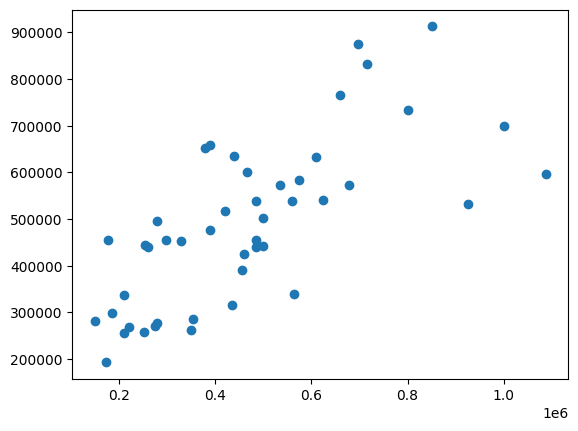

In [ ]:
plt.scatter(y_test,predictions)

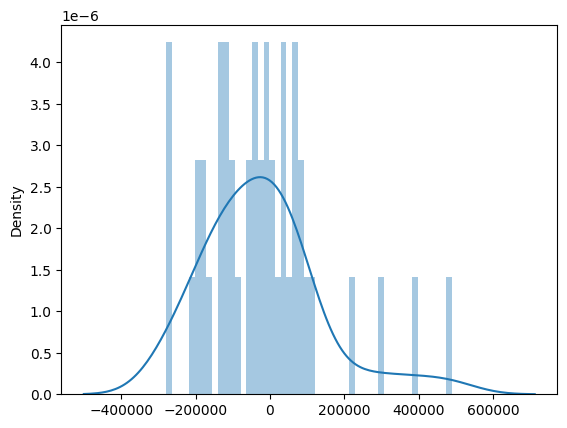

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
linear_rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Linear Regression RMSE:", linear_rmse)

Linear Regression RMSE: 159355.4752102567


### **Using TensorFlow for linear regression**



### Creating and Training

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
model = get_model()

predictions = model.predict(X_test)

In [ ]:
tensorflow_model = Sequential([
    Dense(1, input_shape=(X_train.shape[1],), activation='linear')
])

In [ ]:
tensorflow_model.compile(optimizer='adam', loss='mean_squared_error')

### Model Evaluation

In [ ]:
history = tensorflow_model.fit(X_train, y_train,validation_data = (X_test, y_test), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
143/143 [==============================] - 1s 6ms/step - loss: 631583539200.0000 - val_loss: 270345617408.0000
Epoch 2/50
143/143 [==============================] - 0s 3ms/step - loss: 627985678336.0000 - val_loss: 267404165120.0000
Epoch 3/50
143/143 [==============================] - 0s 3ms/step - loss: 624480681984.0000 - val_loss: 264557068288.0000
Epoch 4/50
143/143 [==============================] - 1s 4ms/step - loss: 621019594752.0000 - val_loss: 261748047872.0000
Epoch 5/50
143/143 [==============================] - 0s 3ms/step - loss: 617641279488.0000 - val_loss: 258973007872.0000
Epoch 6/50
143/143 [==============================] - 0s 2ms/step - loss: 614339248128.0000 - val_loss: 256270565376.0000
Epoch 7/50
143/143 [==============================] - 0s 2ms/step - loss: 611100983296.0000 - val_loss: 253600301056.0000
Epoch 8/50
143/143 [==============================] - 0s 2ms/step - loss: 607914688512.0000 - val_loss: 251010973696.0000
Epoch 9/50
143/143 [====

In [ ]:
tensorflow_rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("TensorFlow Linear Regression RMSE:", tensorflow_rmse)

TensorFlow Linear Regression RMSE: 516199.3064905366


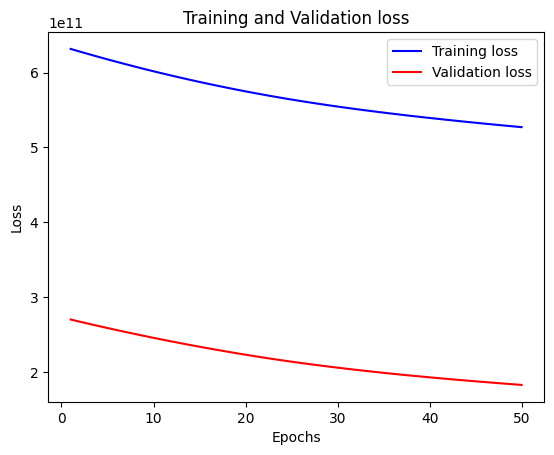

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### **Predictions from our Model**

In [ ]:
preds_on_trained = model.predict(X_test)

2/2 [==============================] - 0s 5ms/step


In [ ]:
compare_predictions(preds_on_untrained,preds_on_trained,y_test)

Accuracy of predictions on untrained model: 0.0
Accuracy of predictions on trained model: 0.0


In [ ]:
predictions = tensorflow_model.predict(X_test)

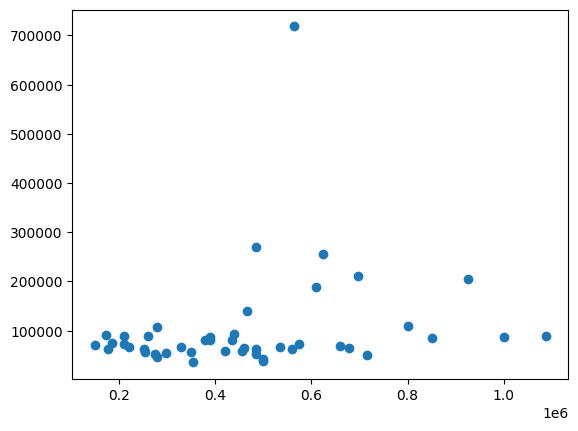

In [ ]:
plt.scatter(y_test,predictions)

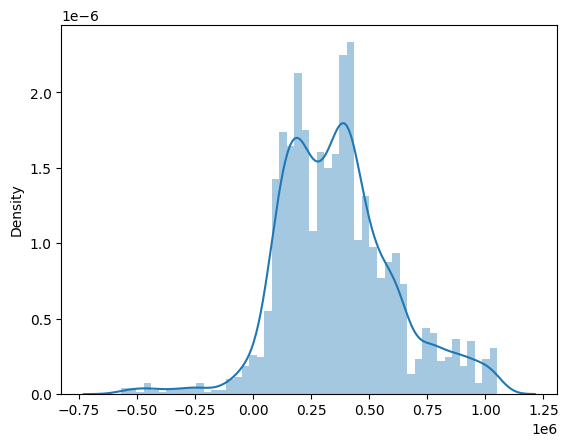

In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
y_mean = data['price'].mean()
y_std = data['price'].std()

def convert_label_actual(pred):
  return int(pred * y_std + y_mean)

print(convert_label_actual(-0.423817))

313000


In [ ]:
price_on_untrained = [convert_label_actual(y) for y in preds_on_untrained]
price_on_trained = [convert_label_actual(y) for y in preds_on_trained]
price_y_test = [convert_label_actual(y) for y in y_test]

In [ ]:
compare_predictions(price_on_untrained,price_on_trained,price_y_test)

Accuracy of predictions on untrained model: 0.0
Accuracy of predictions on trained model: 0.0
